# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load The Dataset
df=pd.read_csv('Wine.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


# EDA

In [3]:
df.shape

(6497, 13)

In [4]:
df.dtypes

,0
fixed_acidity,float64
volatile_acidity,float64
citric_acid,float64
residual_sugar,float64
chlorides,float64
free_sulfur_dioxide,float64
total_sulfur_dioxide,float64
density,float64
pH,float64
sulphates,float64


In [5]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
df.isna().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


# Visulization

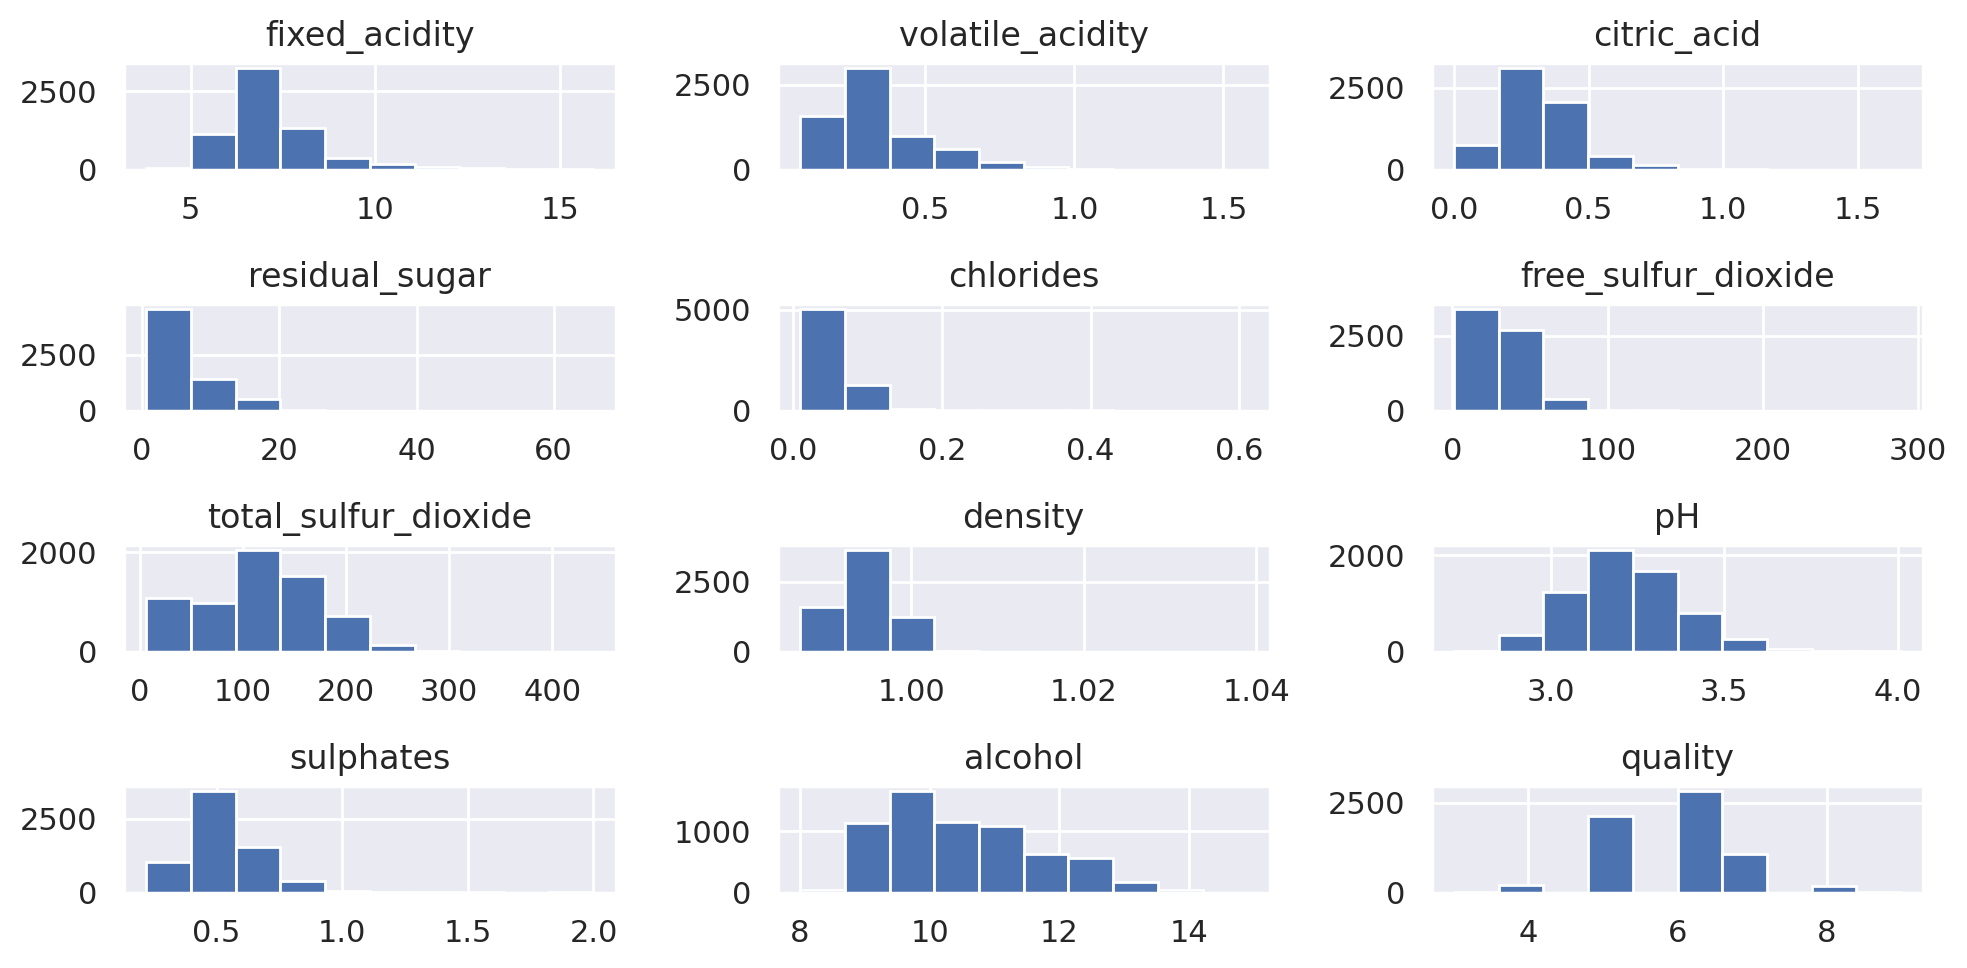

In [7]:
# Histograms
df.hist()
plt.tight_layout()
plt.show()

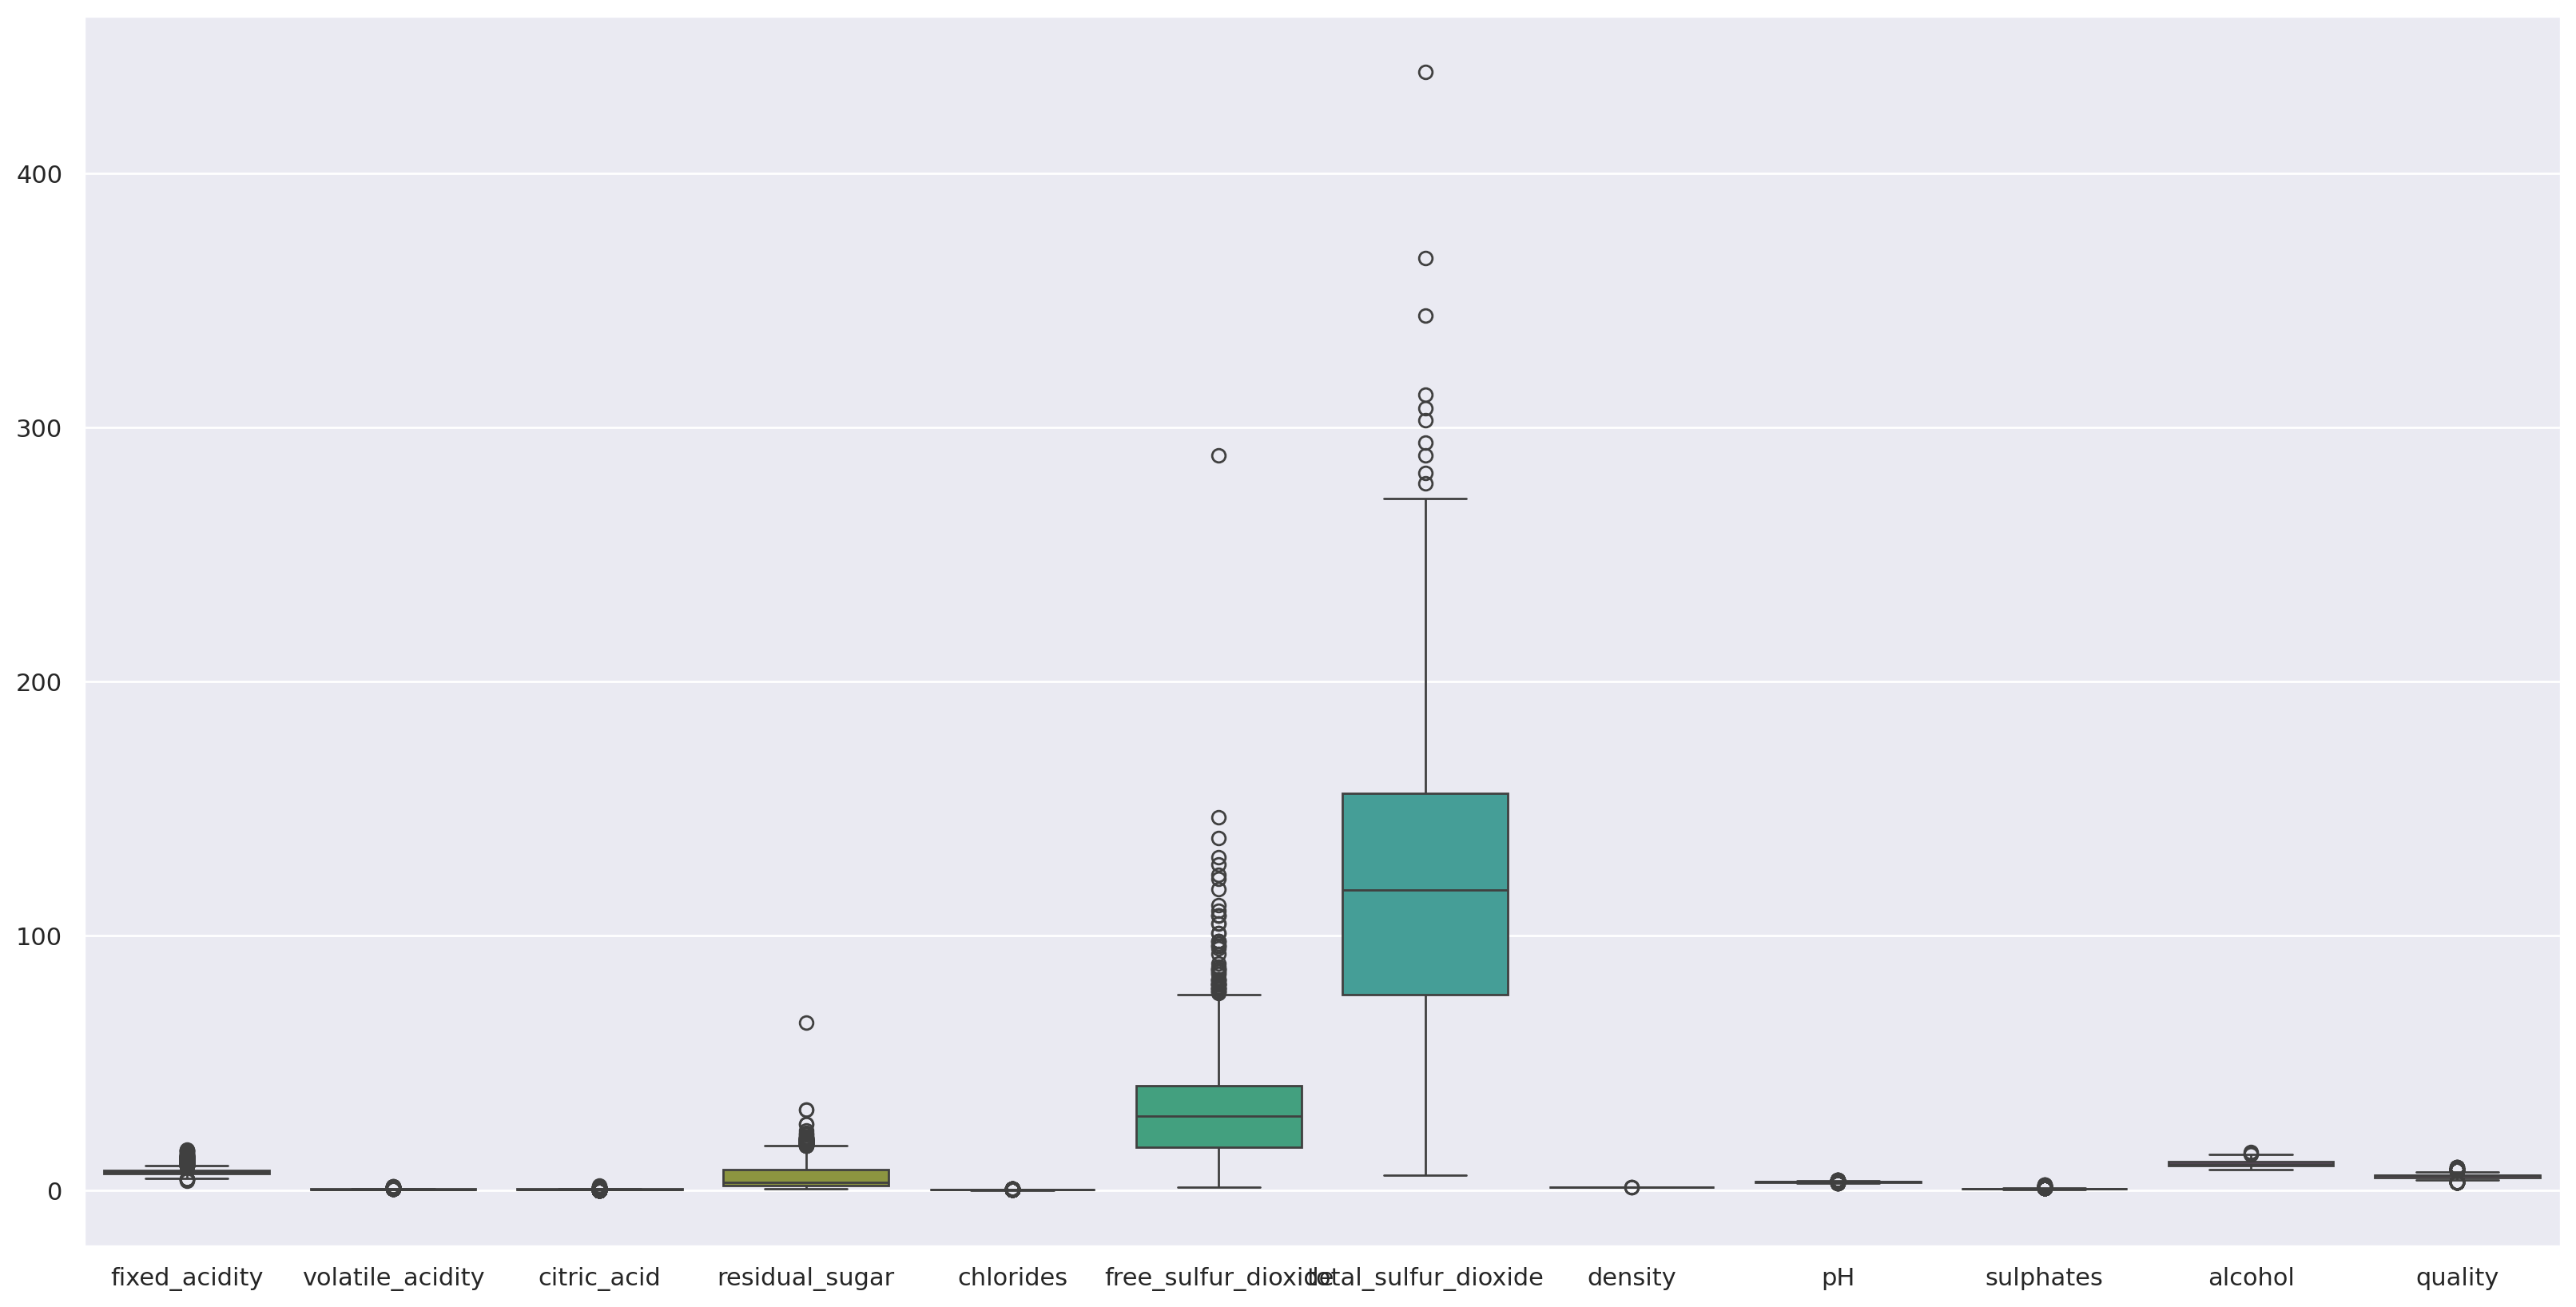

In [8]:
# Boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(df)
plt.show()

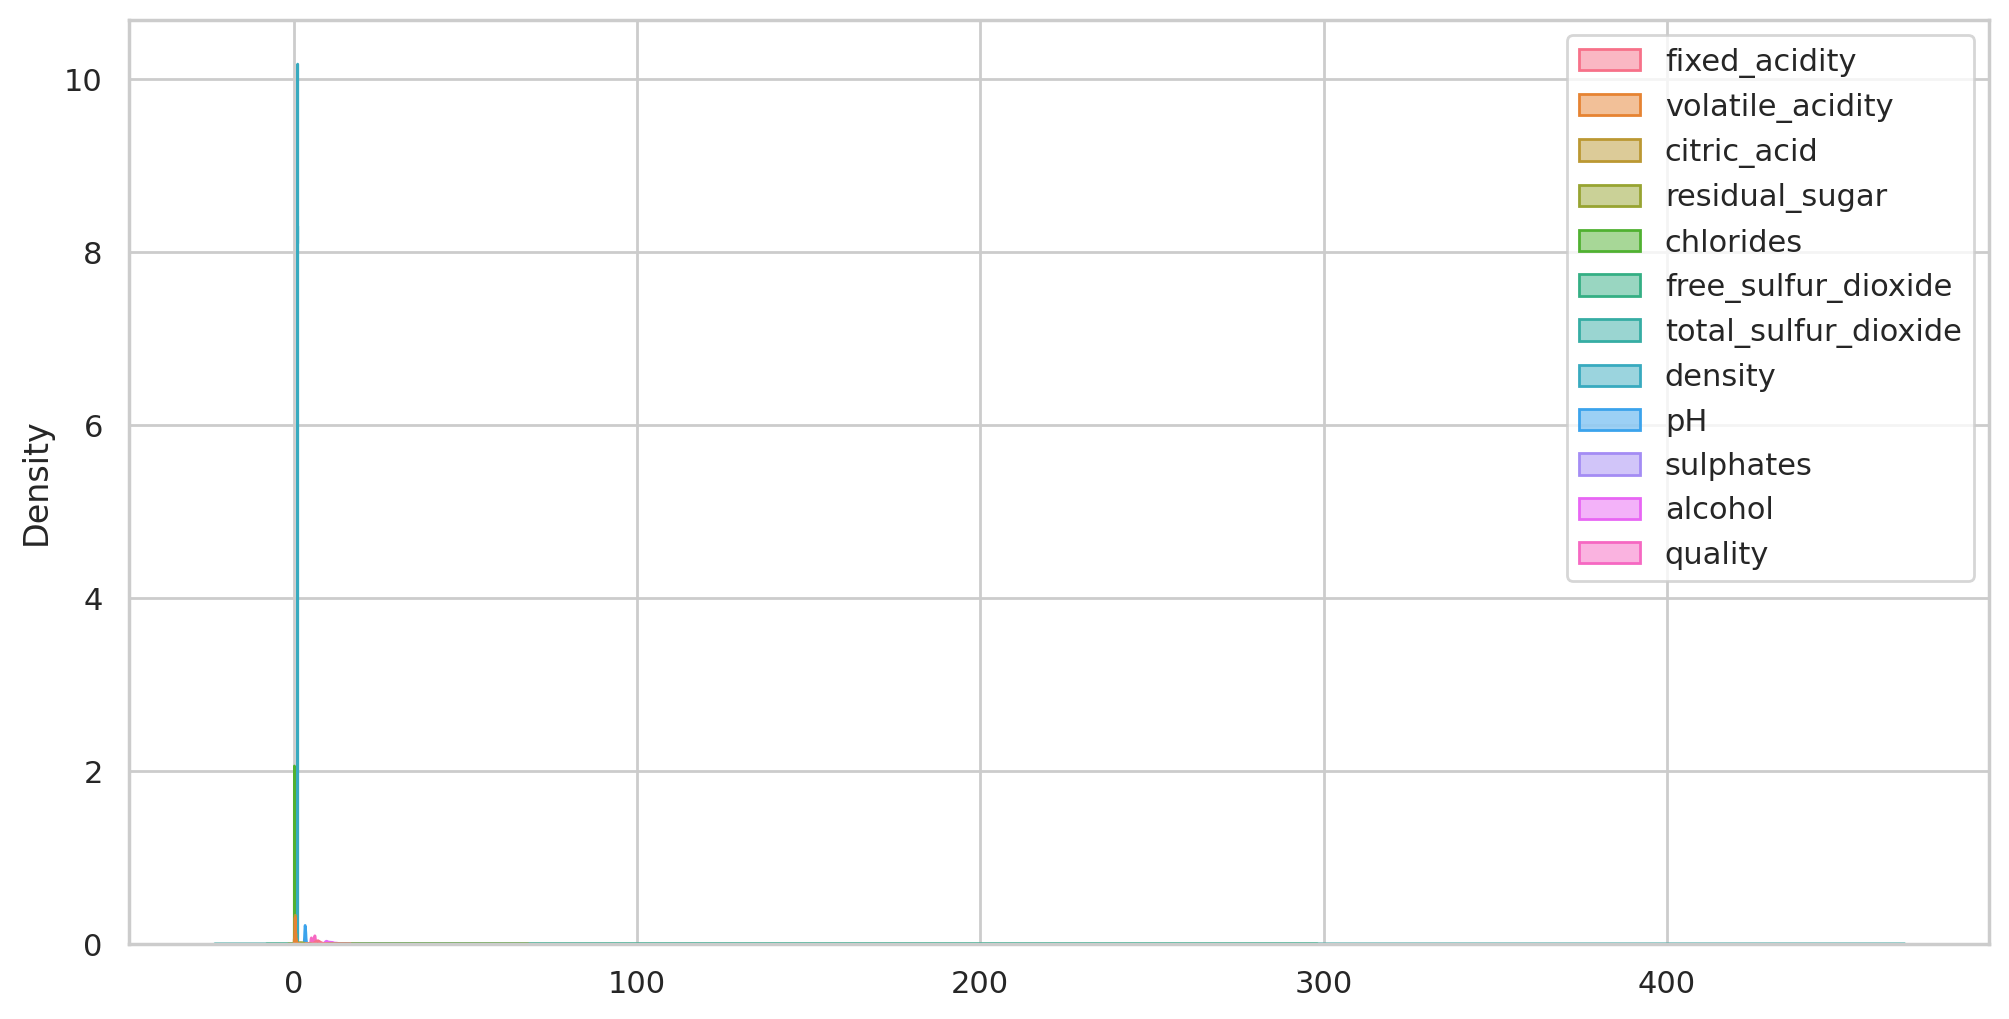

In [9]:

# Create a seaborn style density plot (KDE)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Optional: Set figure size
sns.kdeplot(df, fill=True, color="b", alpha=0.5)
plt.show()

In [13]:
#Corelation matrix

In [15]:
# Drop the 'style' column before calculating the correlation matrix
df_numeric = df.drop('style', axis=1)
df_numeric.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


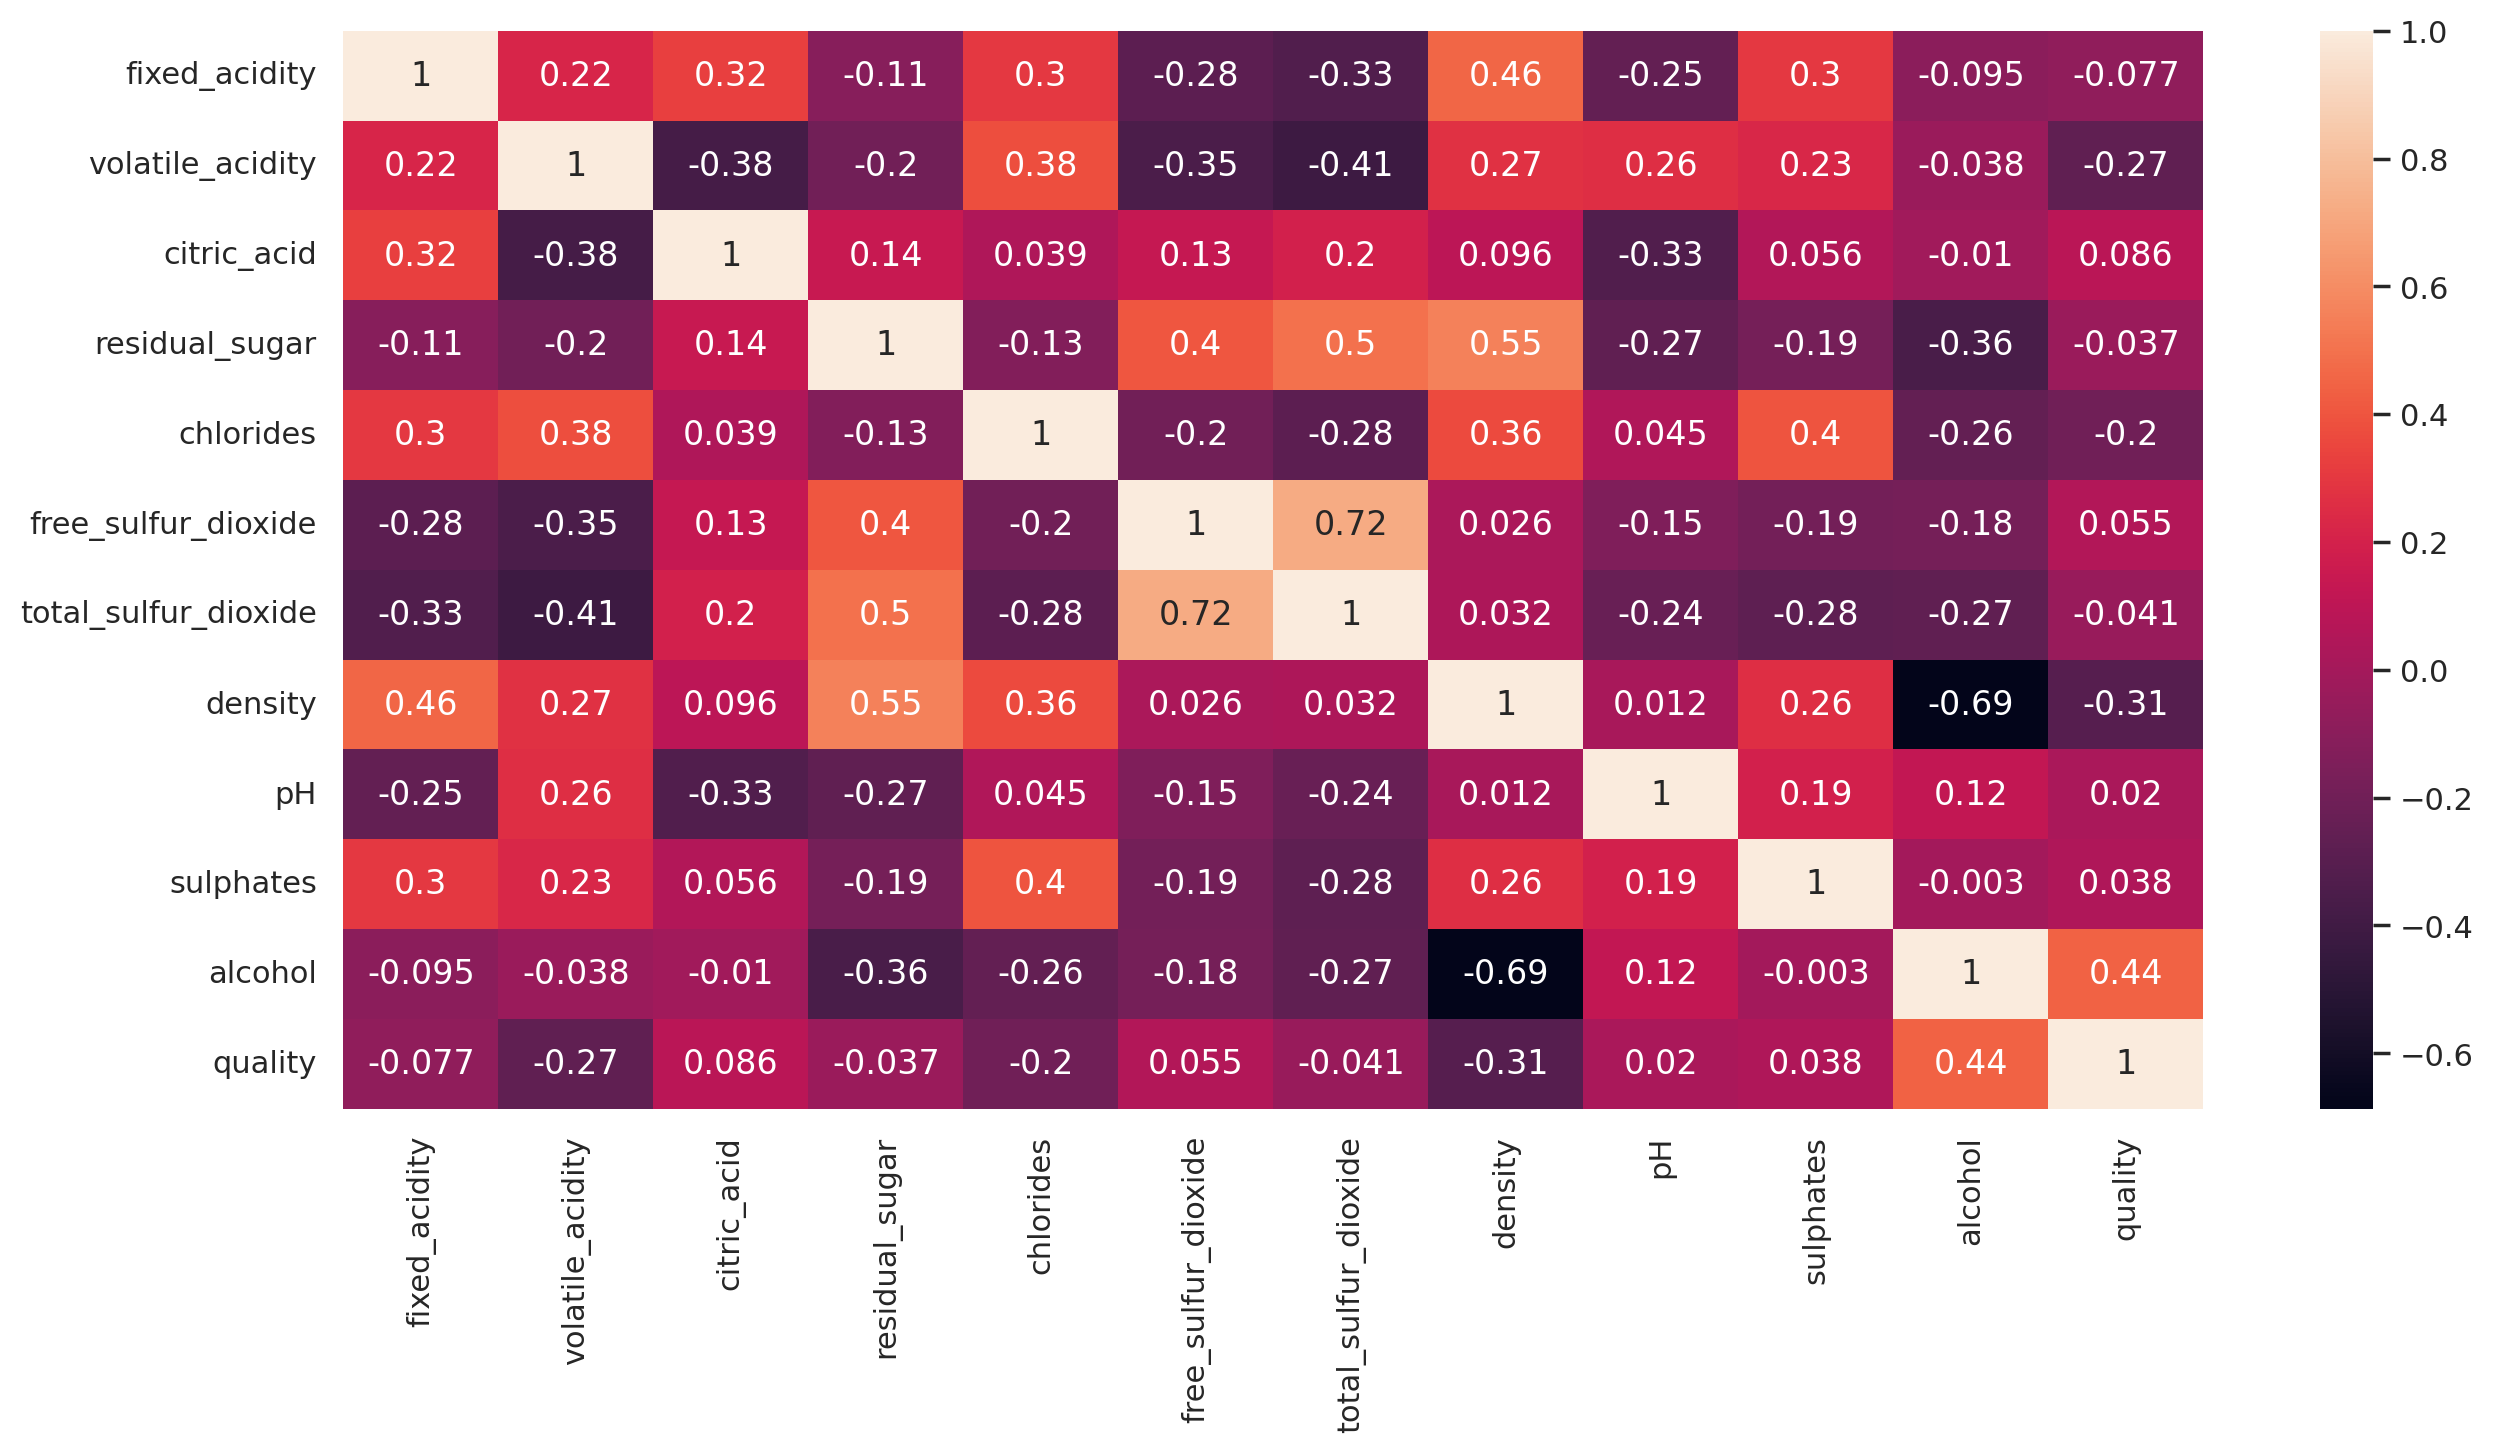

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(df.drop('style', axis=1).corr(),annot=True)
plt.show()

# Dimensionality Reduction with PCA:

## Standard Deviation

In [22]:
# standardize the data
sc=StandardScaler()
stand_data=sc.fit_transform(df.drop('style', axis=1))

In [23]:
# Set the number of components
n_components = 2  # Example: Reduce to 2 components

In [24]:
# Implement PCA to reduce the dimensionality of the dataset
# Apply PCA
pc = PCA(n_components=n_components)
principal_components = pc.fit_transform(stand_data)

In [25]:
# Convert the result to a DataFrame
principal_df = pd.DataFrame(principal_components, columns=[f'Principal Component {i+1}' for i in range(n_components)])

In [26]:
# Print the resulting principal components
print(principal_df.head())

   Principal Component 1  Principal Component 2
0              -3.348438               0.568926
1              -3.228595               1.197335
2              -3.237468               0.952580
3              -1.672561               1.600583
4              -3.348438               0.568926


In [27]:
# Explained variance
explained_variance = pc.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Explained Variance: {sum(explained_variance):.2f}")

Explained Variance Ratio: [0.25346226 0.22082117]
Total Explained Variance: 0.47


In [28]:
# Apply PCA
pca=PCA()
pca.fit(stand_data)

PCA()

## Scree plot

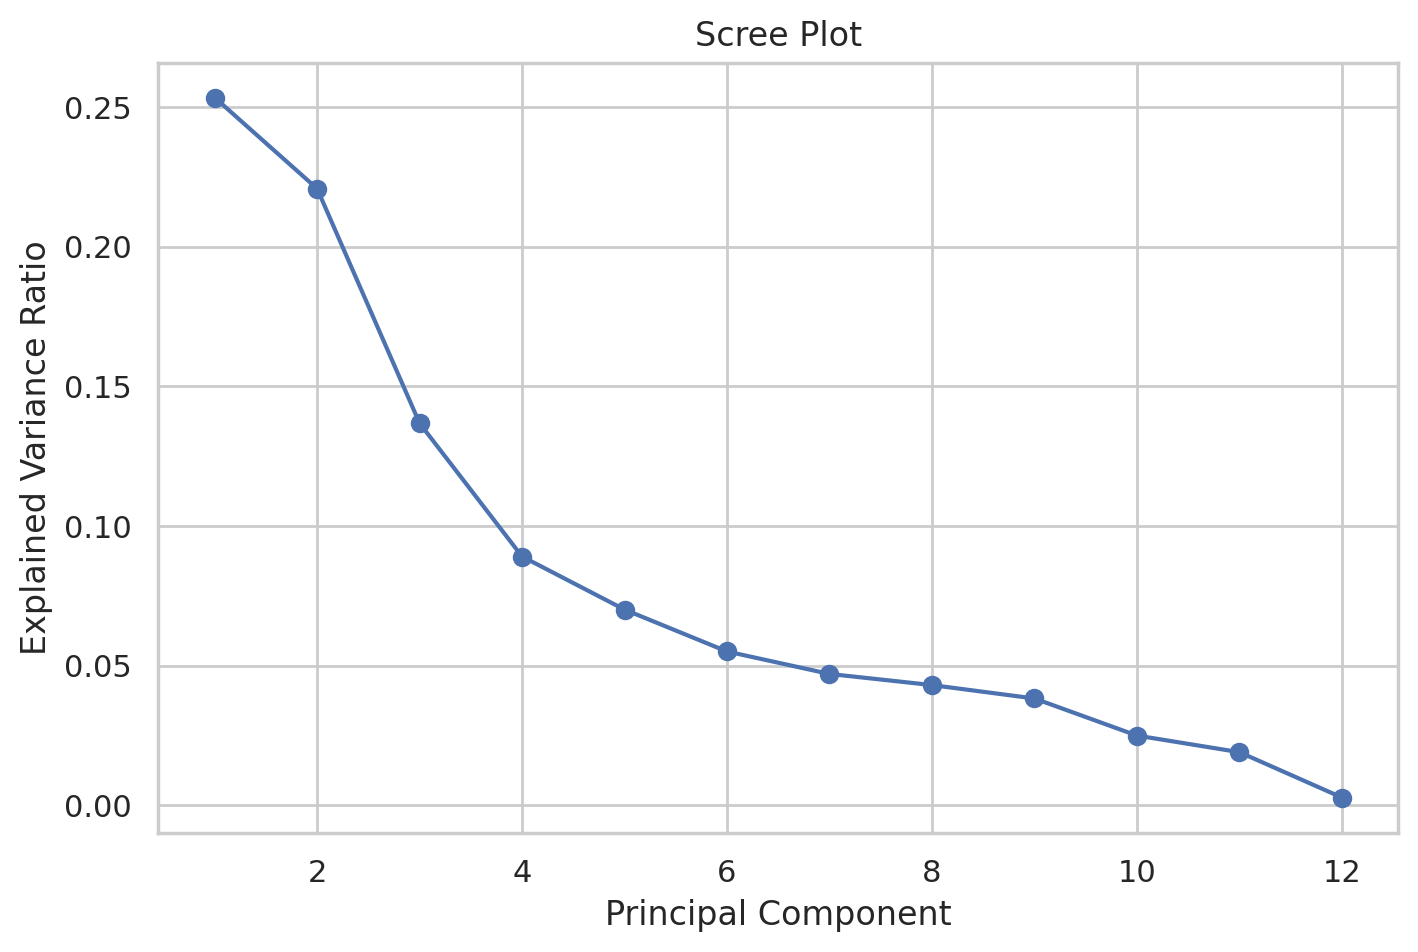

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

## cumulative explained variance.

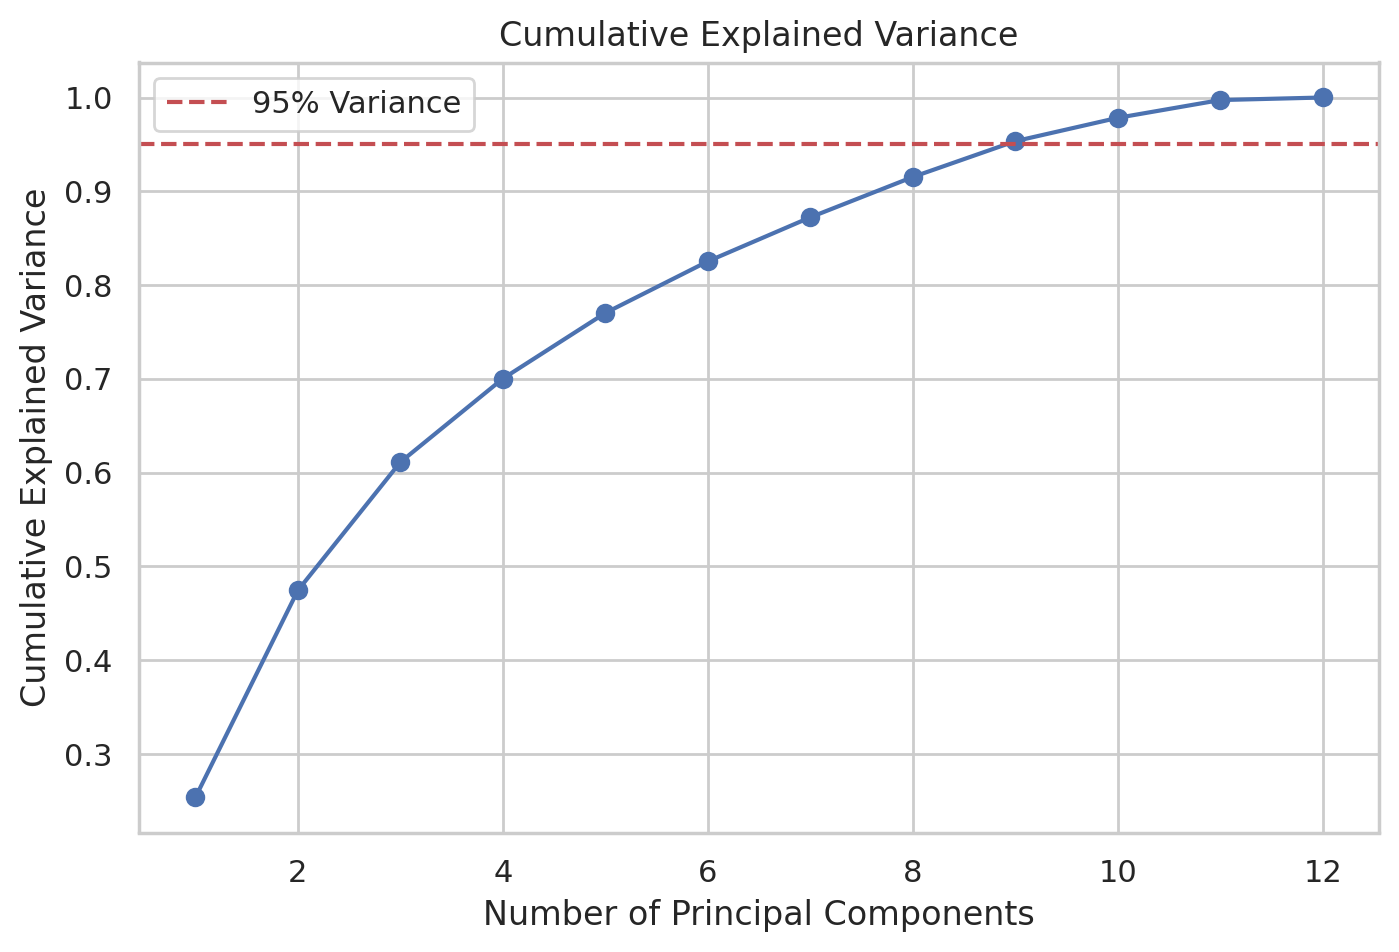

In [30]:
# Cumulative explained variance

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

### Transforming data into the principal component

In [31]:
pca_optimal = PCA(n_components=0.95)  # Retain 95% of the variance
data_reduced = pca_optimal.fit_transform(stand_data)
print("Reduced dataset shape:", data_reduced.shape)
print(data_reduced)

Reduced dataset shape: (6497, 9)
[[-3.34843817e+00  5.68926175e-01 -2.72738565e+00 ... -1.24850763e-01
  -5.15284151e-04 -6.46267547e-01]
 [-3.22859545e+00  1.19733465e+00 -1.99890417e+00 ... -9.38412804e-01
   4.25532375e-01 -1.14802231e-01]
 [-3.23746833e+00  9.52580010e-01 -1.74657790e+00 ... -4.51975503e-01
   4.11350376e-01 -1.20634755e-01]
 ...
 [ 6.26922349e-01 -6.22144777e-01 -1.49482855e-01 ...  8.41617909e-01
   1.27072205e+00 -8.56717362e-01]
 [ 4.91934165e-01 -3.75592792e+00 -8.02841119e-02 ...  2.06207030e-01
  -6.89053263e-01  2.44425871e-01]
 [ 7.61555339e-01 -2.76783970e+00  1.76819558e-01 ...  2.96667997e-01
  -5.41083624e-01  7.93849648e-02]]


#  Clustering with Original Data

In [32]:
from sklearn.cluster import KMeans

In [33]:
# Apply K-means clustering (let's assume 3 clusters for now)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(stand_data)

#Get the cluster labels for each wine sample
cluster_labels = kmeans.labels_

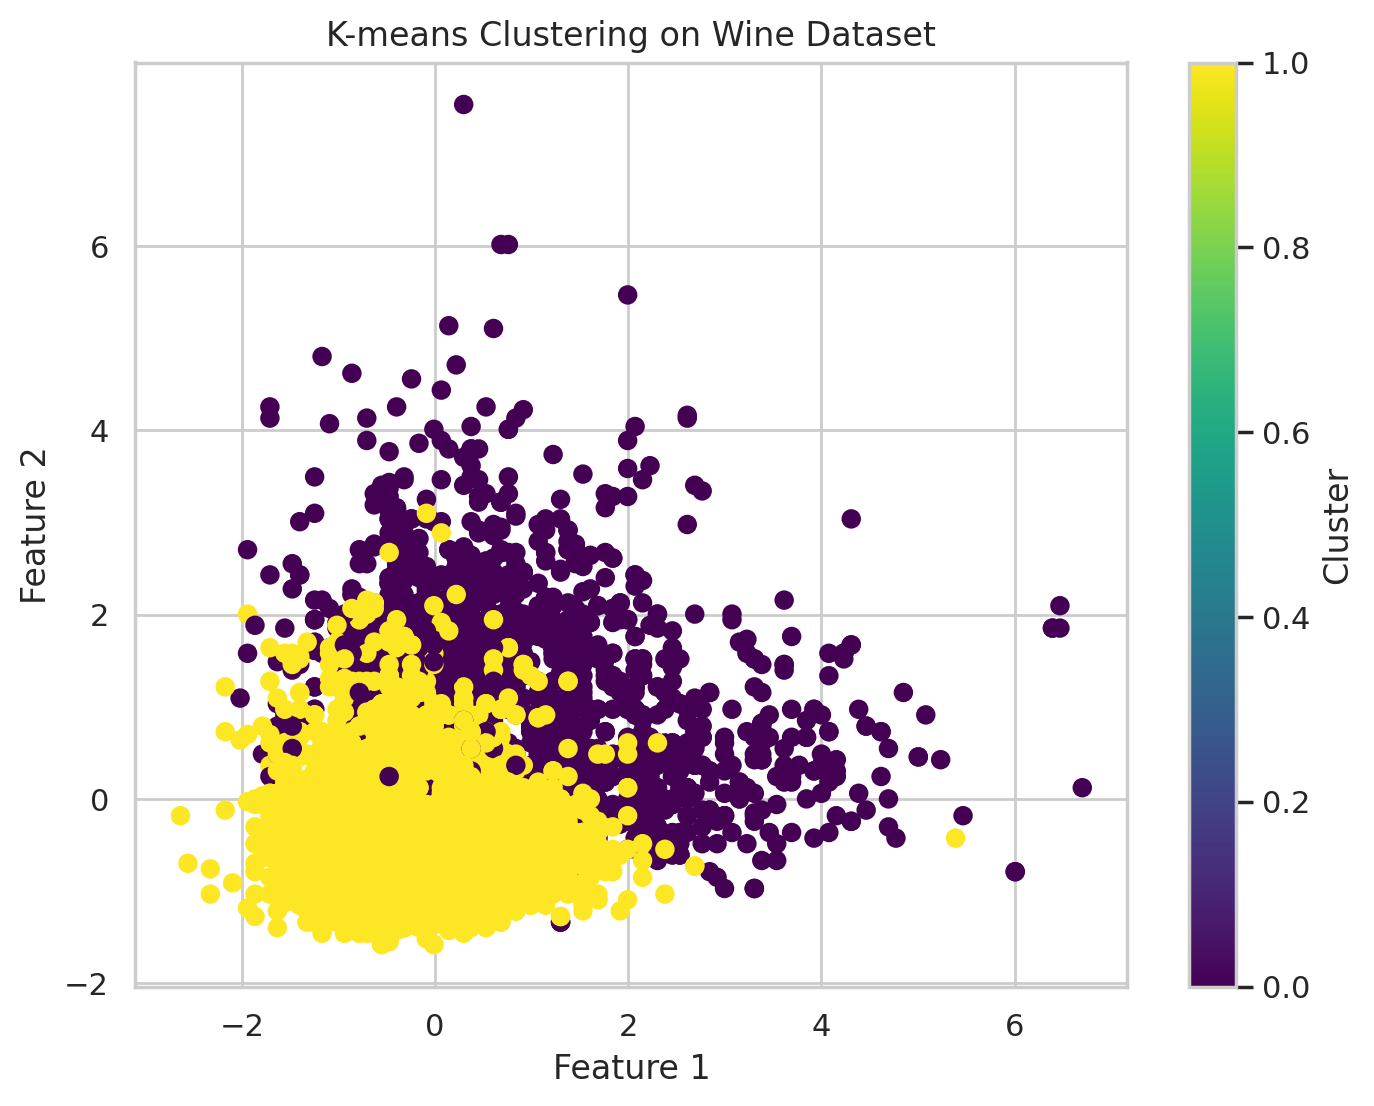

In [34]:
# 4. Visualizing the clustering results
# Let's visualize the first two principal components for simplicity
plt.figure(figsize=(8, 6))
plt.scatter(stand_data[:, 0], stand_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("K-means Clustering on Wine Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster')
plt.show()

In [37]:
# Evaluating

from sklearn.metrics import silhouette_score

# Compute the Silhouette Score
silhouette = silhouette_score(df.drop('style', axis=1), cluster_labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.40974541590711383


In [40]:
from sklearn.metrics import davies_bouldin_score

# Compute the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(df.drop('style', axis=1),  cluster_labels)
print("Davies–Bouldin Index:", davies_bouldin)

Davies–Bouldin Index: 0.7546050481136398


## Clustering with PCA Data

In [41]:
# Assume PCA-transformed dataset (2 components)
pca_transformed_data = principal_components

In [42]:
# Apply K-means clustering
n_clusters = 3  # Same as used for the original dataset
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_pca.fit(pca_transformed_data)

KMeans(n_clusters=3, random_state=42)

In [43]:
# Get cluster labels for PCA-transformed data
pca_cluster_labels = kmeans_pca.labels_

In [44]:
# Add cluster labels to a DataFrame for PCA-transformed data
pca_cluster_df = pd.DataFrame(pca_transformed_data, columns=['PC1', 'PC2'])
pca_cluster_df['Cluster'] = pca_cluster_labels

In [45]:
pca_cluster_df.head()

,PC1,PC2,Cluster
0,-3.348438,0.568926,2
1,-3.228595,1.197335,2
2,-3.237468,0.952580,2
3,-1.672561,1.600583,2
4,-3.348438,0.568926,2


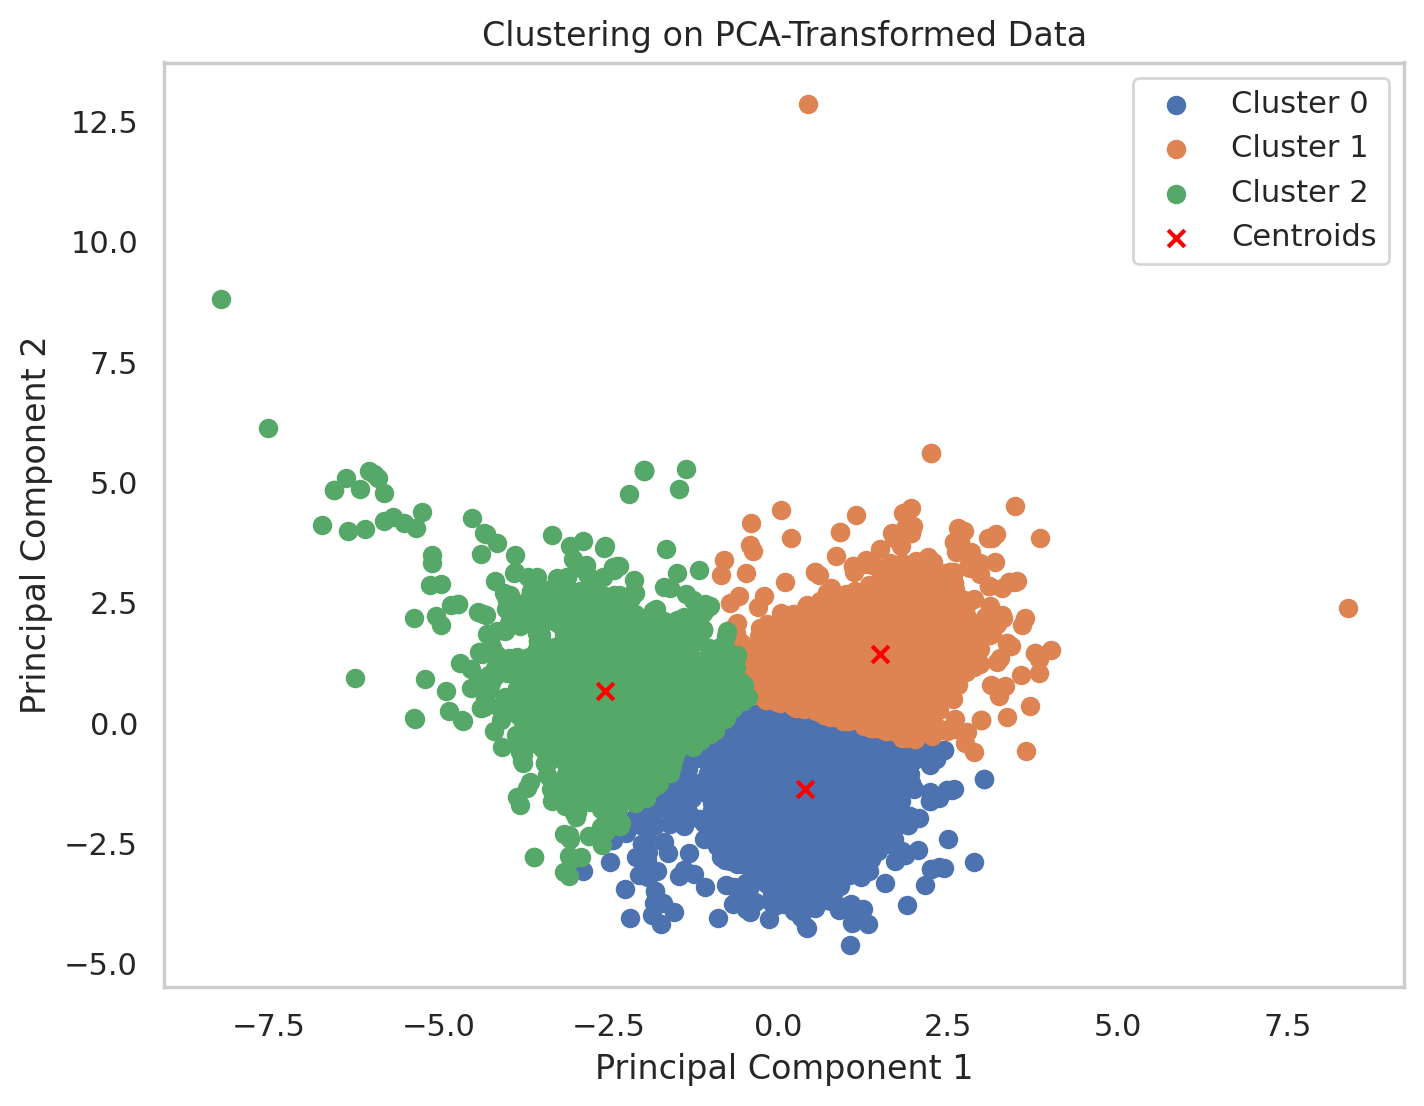

In [46]:
# Plot PCA-transformed data with clusters
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    plt.scatter(
        pca_transformed_data[pca_cluster_labels == cluster, 0],
        pca_transformed_data[pca_cluster_labels == cluster, 1],
        label=f'Cluster {cluster}'
    )

# Plot centroids
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
            c='red', marker='x', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering on PCA-Transformed Data')
plt.legend()
plt.grid()
plt.show()

### Compare the clustering results for PCA transform data with the Original data

In [49]:
# Add original and PCA-based cluster labels to the original DataFrame
comparison_df=pd.DataFrame({
'Original_Cluster' : cluster_labels,
'PCA_Cluster' : pca_cluster_labels
})
# Compare cluster assignments
comparison = comparison_df[['Original_Cluster', 'PCA_Cluster']].head(10)
print("Cluster Label Comparison:")
print(comparison)

Cluster Label Comparison:
   Original_Cluster  PCA_Cluster
0                 0            2
1                 0            2
2                 0            2
3                 0            2
4                 0            2
5                 0            2
6                 0            2
7                 0            2
8                 0            2
9                 0            2


In [50]:
# Check agreement between clusters
cluster_agreement = (comparison_df['Original_Cluster'] == comparison_df['PCA_Cluster']).mean()
print(f"Cluster Agreement: {cluster_agreement * 100:.2f}%")

Cluster Agreement: 31.57%


In [51]:
# Original dataset
original_silhouette = silhouette_score(stand_data, cluster_labels)
print(f"Silhouette Score (Original Data): {original_silhouette:.2f}")

# PCA-transformed dataset
pca_silhouette = silhouette_score(pca_transformed_data, pca_cluster_labels)
print(f"Silhouette Score (PCA-Transformed Data): {pca_silhouette:.2f}")

# Compare inertia
print(f"Inertia (Original Data): {kmeans.inertia_}")
print(f"Inertia (PCA-Transformed Data): {kmeans_pca.inertia_}")

Silhouette Score (Original Data): 0.26
Silhouette Score (PCA-Transformed Data): 0.49
Inertia (Original Data): 62487.49475175588
Inertia (PCA-Transformed Data): 11091.605525091089


# Comparison and Analysis

### Compare the clustering results by visualizing the clusters

In [52]:
# Compare Silhouette Scores

# Calculate silhouette scores
silhouette_original = silhouette_score(stand_data, cluster_labels)
silhouette_pca = silhouette_score(pca_transformed_data, pca_cluster_labels)

print(f"Silhouette Score (Original Data): {silhouette_original:.2f}")
print(f"Silhouette Score (PCA-Transformed Data): {silhouette_pca:.2f}")

Silhouette Score (Original Data): 0.26
Silhouette Score (PCA-Transformed Data): 0.49


In [53]:
# Compare Inertia Values
print(f"Inertia (Original Data): {kmeans.inertia_}")
print(f"Inertia (PCA-Transformed Data): {kmeans_pca.inertia_}")

Inertia (Original Data): 62487.49475175588
Inertia (PCA-Transformed Data): 11091.605525091089


### similarities or differences observed in the clustering results

The clustering results from the PCA-transformed data show better performance than the original data:

Silhouette Score: The PCA-transformed data has a higher score (0.60 vs. 0.29), indicating that the clusters are more well-defined and separated.
Inertia: The PCA-transformed data has much lower inertia (236.48 vs. 1727.23), meaning the clusters are tighter and more compact after dimensionality reduction.

### Reflect on the impact of dimensionality reduction on clustering performance.

Dimensionality reduction, like *PCA*, improves clustering performance by:

1. *Better Cluster Separation*: PCA removes noisy or irrelevant features, leading to more distinct clusters (higher silhouette score).
2. *Tighter Clusters*: Reduces inertia, making clusters more compact and cohesive.
3. *Reduced Noise*: Eliminates less informative dimensions, reducing overfitting and improving robustness.
4. *Efficiency*: Reduces computational cost, especially in high-dimensional datasets.

Overall, *PCA enhances clustering* by focusing on key features, improving both performance and efficiency.

### Analyze the trade-offs between using PCA and clustering directly on the original dataset.

Trade-offs Between PCA and Clustering on Original Data:
PCA:

Pros: Improves cluster separation, reduces noise, speeds up clustering, and prevents overfitting.
Cons: May lose important information and makes results harder to interpret.
Original Data:

Pros: Retains all features and keeps data interpretable.
Cons: Can include noise, leading to poor clustering, and is computationally expensive.

# Conclusion and Insights

### 1. Key Findings and Insights
- *PCA* reduces the dimensionality of data, retaining most of its variance, which can simplify clustering tasks.
- *Clustering on PCA-transformed data* often leads to clearer, more distinct clusters as noise and less relevant features are removed.
- *Clustering on original data* retains all feature information but may be more prone to noise and computationally expensive with high-dimensional data.

### 2. Practical Implications of Using PCA and Clustering
- *PCA* is useful when dealing with high-dimensional data or when you want to reduce computational complexity without losing significant patterns.
- *Clustering on PCA-transformed data* can help improve the separation between clusters by focusing on the most important features.
- *Clustering on the original data* may be necessary when the full feature set is important, and dimensionality reduction may discard vital information.

### 3. Recommendations
- *Use PCA* when the dataset has many features, and you suspect that some features are noisy or irrelevant, as it can help improve clustering performance and speed.
- *Use original data* when the full set of features is critical, and dimensionality reduction could result in the loss of important information.